In [2]:
# Imports necesarios para el notebook
import random

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from John_Jellicoe import algoritmo_JJ
from backtracking import resolver_tablero

from auxiliares import generar_caso_de_prueba, print_tablero

from util import time_algorithm

# Siempre seteamos la seed de aleatoridad para que los # resultados sean reproducibles
random.seed(12345)
np.random.seed(12345)

sns.set_theme()

In [7]:
import time

x = np.linspace(10, 500, 10).astype(int) 

offset_n_m = 1
k_boats = 10
num_trials = 1
results = {
    'size': [],
    'jj_time': [],
    'backtrack_time': [],
    'optimality_ratio': [],
    'jj_demand_fulfilled': [],
    'optimal_demand_fulfilled': []
}
worst_ratio =1
worst_parameters = None
ratios=[]
for size in x:
    # print(f"Tamaño {size}...")
    size_results = {
        'jj_time': [],
        'backtrack_time': [],
        'optimality_ratio': [],
        'jj_demand': [],
        'opt_demand': []
    }

    for trial in range(num_trials):
        n, m, ship_lengths, row_restrictions, col_restrictions = generar_caso_de_prueba(size, size, k_boats)
        original_row = row_restrictions.copy()
        original_col = col_restrictions.copy()
        total_demand = sum(original_row) + sum(original_col)
        
        print(f"Tamaño {n}x{m} ...")

        start_time = time.time()
        tablero_jj, demanda_restante_jj = algoritmo_JJ(n, m, ship_lengths, row_restrictions.copy(), col_restrictions.copy())
        jj_time = time.time() - start_time
        jj_demand_fulfilled = total_demand - demanda_restante_jj
        
        start_time = time.time()
        result_optimal = resolver_tablero(ship_lengths, original_row, original_col, sum(original_row), sum(original_col))
        backtrack_time = time.time() - start_time
        optimal_demand_fulfilled = result_optimal["demanda_cumplida"]
        
        optimality_ratio = jj_demand_fulfilled / optimal_demand_fulfilled if optimal_demand_fulfilled > 0 else 0
        ratios.append(optimality_ratio)
        if optimality_ratio < worst_ratio:
            worst_ratio = optimality_ratio
            worst_parameters = (n, m, ship_lengths, original_row, original_col)
        
        size_results['jj_time'].append(jj_time)
        size_results['backtrack_time'].append(backtrack_time)
        size_results['optimality_ratio'].append(optimality_ratio)
        size_results['jj_demand'].append(jj_demand_fulfilled)
        size_results['opt_demand'].append(optimal_demand_fulfilled)
    
    results['size'].append(size)
    results['jj_time'].append(np.mean(size_results['jj_time']))
    results['backtrack_time'].append(np.mean(size_results['backtrack_time']))
    results['optimality_ratio'].append(np.mean(size_results['optimality_ratio']))
    results['jj_demand_fulfilled'].append(np.mean(size_results['jj_demand']))
    results['optimal_demand_fulfilled'].append(np.mean(size_results['opt_demand']))

print(f"Peor ratio: {worst_ratio} para {worst_parameters}")


Tamaño 10x20 ...
Tamaño 64x27 ...
Tamaño 118x125 ...
Tamaño 173x213 ...
Tamaño 227x191 ...
Tamaño 282x461 ...
Tamaño 336x355 ...


KeyboardInterrupt: 

In [ ]:
import time

x = np.linspace(10, 500, 30).astype(int) 

offset_n_m = 1
k_boats = 10
num_trials = 1
results = {
    'size': [],
    'jj_time': [],
    'backtrack_time': [],
    'optimality_ratio': [],
    'jj_demand_fulfilled': [],
    'optimal_demand_fulfilled': [],
    "jj_demand_mean":[],
}
worst_ratio =1
worst_parameters = None
ratios=[]
for size in x:
    # print(f"Tamaño {size}...")
    size_results = {
        'jj_time': [],
        'backtrack_time': [],
        'optimality_ratio': [],
        'jj_demand': [],
        'opt_demand': []
    }

    for trial in range(num_trials):
        n, m, ship_lengths, row_restrictions, col_restrictions = generar_caso_de_prueba(size, size, k_boats)
        original_row = row_restrictions.copy()
        original_col = col_restrictions.copy()
        total_demand = sum(original_row) + sum(original_col)
        
        print(f"Tamaño {n}x{m} ...")

        start_time = time.time()
        tablero_jj, demanda_restante_jj = algoritmo_JJ(n, m, ship_lengths, row_restrictions.copy(), col_restrictions.copy())
        jj_time = time.time() - start_time
        jj_demand_fulfilled = total_demand - demanda_restante_jj
        
        start_time = time.time()
        result_optimal = resolver_tablero(ship_lengths, original_row, original_col, sum(original_row), sum(original_col))
        backtrack_time = time.time() - start_time
        optimal_demand_fulfilled = result_optimal["demanda_cumplida"]
        
        optimality_ratio = jj_demand_fulfilled / optimal_demand_fulfilled if optimal_demand_fulfilled > 0 else 0
        ratios.append(optimality_ratio)
        if optimality_ratio < worst_ratio:
            worst_ratio = optimality_ratio
            worst_parameters = (n, m, ship_lengths, original_row, original_col)
        
        size_results['jj_time'].append(jj_time)
        size_results['backtrack_time'].append(backtrack_time)
        size_results['optimality_ratio'].append(optimality_ratio)
        size_results['jj_demand'].append(jj_demand_fulfilled)
        size_results['opt_demand'].append(optimal_demand_fulfilled)
    
    results['size'].append(size)
    results['jj_time'].append(np.mean(size_results['jj_time']))
    results['backtrack_time'].append(np.mean(size_results['backtrack_time']))
    results['optimality_ratio'].append(np.mean(size_results['optimality_ratio']))
    results['jj_demand_fulfilled'].append(np.mean(size_results['jj_demand']))
    results['optimal_demand_fulfilled'].append(np.mean(size_results['opt_demand']))

print(f"Peor ratio: {worst_ratio} para {worst_parameters}")


In [5]:
ratio_promedio = np.mean(ratios)
print(f"Ratio promedio: {ratio_promedio}")

Ratio promedio: 0.9758620689655173


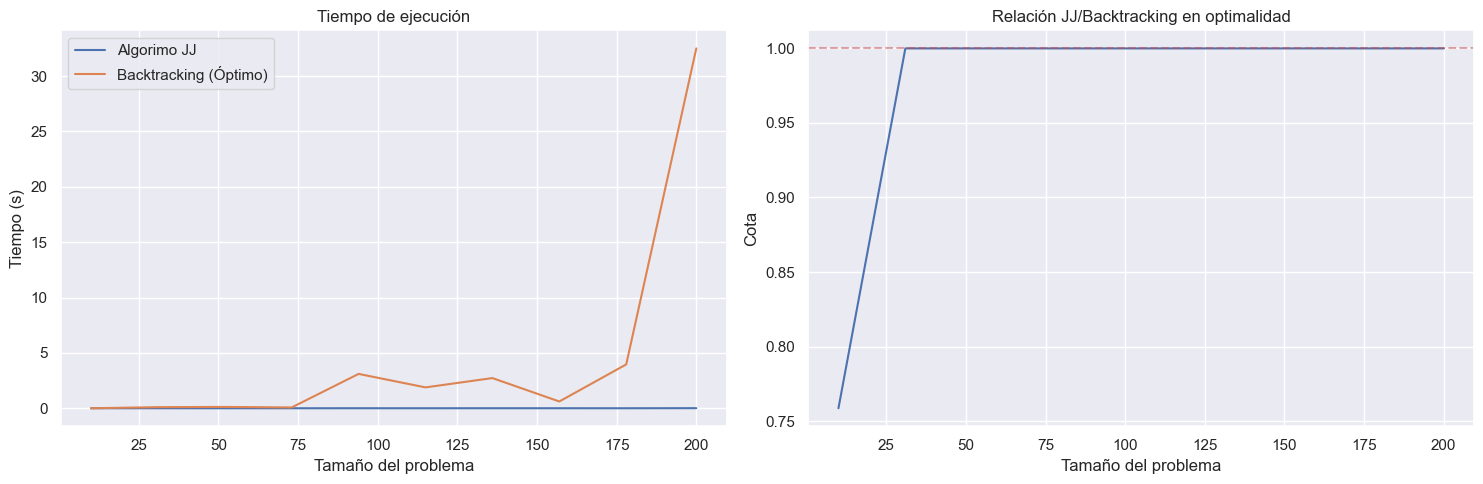

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(results['size'], results['jj_time'], label='Algorimo JJ')
ax1.plot(results['size'], results['backtrack_time'], label='Backtracking (Óptimo)')
ax1.set_title('Tiempo de ejecución')
ax1.set_xlabel('Tamaño del problema')
ax1.set_ylabel('Tiempo (s)')
ax1.legend()
# ax1.set_yscale('log')

# Plot optimality ratio
ax2.plot(results['size'], results['optimality_ratio'])
ax2.set_title('Relación JJ/Backtracking en optimalidad')
ax2.set_xlabel('Tamaño del problema')
ax2.set_ylabel('Cota')
ax2.axhline(y=1.0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()


# Calculo para matriz grande (incalculable para algoritmo de BT)

In [ ]:
import time

x = np.linspace(10, 500, 30).astype(int) 

offset_n_m = 1
k_boats = 10
num_trials = 1
results = {
    'size': [],
    'jj_time': [],
    'backtrack_time': [],
    'optimality_ratio': [],
    'jj_demand_fulfilled': [],
    'optimal_demand_fulfilled': [],
    "jj_demand_mean":[],
    "bt_demand_mean":[]
}
worst_ratio =1
worst_parameters = None
ratios=[]
for size in x:
    # print(f"Tamaño {size}...")
    size_results = {
        'jj_time': [],
        'backtrack_time': [],
        'optimality_ratio': [],
        'jj_demand': [],
        'opt_demand': [],
        "jj_demand_mean":[],
        "bt_demand_mean":[]

    }

    for trial in range(num_trials):
        n, m, ship_lengths, row_restrictions, col_restrictions = generar_caso_de_prueba(size, size, k_boats)
        original_row = row_restrictions.copy()
        original_col = col_restrictions.copy()
        total_demand = sum(original_row) + sum(original_col)
        
        print(f"Tamaño {n}x{m} ...")

        start_time = time.time()
        tablero_jj, demanda_restante_jj = algoritmo_JJ(n, m, ship_lengths, row_restrictions.copy(), col_restrictions.copy())
        jj_time = time.time() - start_time
        jj_demand_fulfilled = total_demand - demanda_restante_jj
        
        start_time = time.time()
        result_optimal = resolver_tablero(ship_lengths, original_row, original_col, sum(original_row), sum(original_col))
        backtrack_time = time.time() - start_time
        optimal_demand_fulfilled = result_optimal["demanda_cumplida"]
        
        optimality_ratio = jj_demand_fulfilled / optimal_demand_fulfilled if optimal_demand_fulfilled > 0 else 0
        ratios.append(optimality_ratio)
        if optimality_ratio < worst_ratio:
            worst_ratio = optimality_ratio
            worst_parameters = (n, m, ship_lengths, original_row, original_col)
        
        size_results['jj_time'].append(jj_time)
        size_results['backtrack_time'].append(backtrack_time)
        size_results['optimality_ratio'].append(optimality_ratio)
        size_results['jj_demand'].append(jj_demand_fulfilled)
        size_results['opt_demand'].append(optimal_demand_fulfilled)
        size_results['jj_demand_mean'].append(jj_demand_fulfilled/total_demand)
        size_results['bt_demand_mean'].append(optimal_demand_fulfilled/total_demand)
    
    results['size'].append(size)
    results['jj_time'].append(np.mean(size_results['jj_time']))
    results['backtrack_time'].append(np.mean(size_results['backtrack_time']))
    results['optimality_ratio'].append(np.mean(size_results['optimality_ratio']))
    results['jj_demand_fulfilled'].append(np.mean(size_results['jj_demand']))
    results['optimal_demand_fulfilled'].append(np.mean(size_results['opt_demand']))
    results['jj_demand_mean'].append(size_results['jj_demand_mean'])
    results['bt_demand_mean'].append(size_results['bt_demand_mean'])
print(f"Peor ratio: {worst_ratio} para {worst_parameters}")


Tamaño 10x20 ...
Tamaño 31x1 ...
Tamaño 52x62 ...
Tamaño 73x39 ...
Tamaño 94x48 ...
Tamaño 115x125 ...
Tamaño 136x204 ...
Tamaño 157x179 ...
Tamaño 178x85 ...
Tamaño 200x66 ...
Peor ratio: 0.7213114754098361 para (10, 20, [9, 9, 8, 8, 7, 7, 6, 3, 2, 2], [8, 12, 12, 10, 10, 20, 19, 11, 15, 10], [10, 5, 10, 8, 9, 5, 9, 6, 10, 8, 5, 8, 6, 6, 9, 6, 9, 5, 2, 10])


In [ ]:
demand_mean = np.mean(results['jj_demand_mean'])
print(f"Ratio promedio: {demand_mean}")

bt_demand_mean = np.mean(results['bt_demand_mean'])
print(f"Ratio promedio: {bt_demand_mean}")

Ratio promedio: 0.14322308517013443
Ratio promedio: 0.15855531400690168


In [14]:
import time

x = np.linspace(10, 10000, 100).astype(int) 

offset_n_m = 1
k_boats = 10
num_trials = 1
results = {
    'size': [],
    'jj_time': [],
    'backtrack_time': [],
    'optimality_ratio': [],
    'jj_demand_fulfilled': [],
    'optimal_demand_fulfilled': [],
    "jj_demand_mean":[],
}
worst_ratio =1
worst_parameters = None
ratios=[]
for size in x:
    # print(f"Tamaño {size}...")
    size_results = {
        'jj_time': [],
        'backtrack_time': [],
        'optimality_ratio': [],
        'jj_demand': [],
        'opt_demand': [],
        "jj_demand_mean":[],
    }

    for trial in range(num_trials):
        n, m, ship_lengths, row_restrictions, col_restrictions = generar_caso_de_prueba(size, size, k_boats)
        original_row = row_restrictions.copy()
        original_col = col_restrictions.copy()
        total_demand = sum(original_row) + sum(original_col)
        
        print(f"Tamaño {n}x{m} ...")

        start_time = time.time()
        tablero_jj, demanda_restante_jj = algoritmo_JJ(n, m, ship_lengths, row_restrictions.copy(), col_restrictions.copy())
        jj_time = time.time() - start_time
        jj_demand_fulfilled = total_demand - demanda_restante_jj
        print("Demanda cumplida:",jj_demand_fulfilled, "demanda total:",total_demand)
        
        start_time = time.time()
        #result_optimal = resolver_tablero(ship_lengths, original_row, original_col, sum(original_row), sum(original_col))
        backtrack_time = time.time() - start_time
        #optimal_demand_fulfilled = result_optimal["demanda_cumplida"]
        
       # optimality_ratio = jj_demand_fulfilled / optimal_demand_fulfilled if optimal_demand_fulfilled > 0 else 0
       # ratios.append(optimality_ratio)
       # if optimality_ratio < worst_ratio:
        ##    worst_ratio = optimality_ratio
          #  worst_parameters = (n, m, ship_lengths, original_row, original_col)
        
        size_results['jj_time'].append(jj_time)
        size_results['backtrack_time'].append(backtrack_time)
        # size_results['optimality_ratio'].append(optimality_ratio)
        size_results['jj_demand'].append(jj_demand_fulfilled)
        # size_results['opt_demand'].append(optimal_demand_fulfilled)
        size_results['jj_demand_mean'].append(jj_demand_fulfilled/total_demand)
    
    results['size'].append(size)
    results['jj_time'].append(np.mean(size_results['jj_time']))
    results['backtrack_time'].append(np.mean(size_results['backtrack_time']))
    results['optimality_ratio'].append(np.mean(size_results['optimality_ratio']))
    results['jj_demand_fulfilled'].append(np.mean(size_results['jj_demand']))
    results['optimal_demand_fulfilled'].append(np.mean(size_results['opt_demand']))
    results['jj_demand_mean'].append(np.mean(size_results['jj_demand_mean']))

# print(f"Peor ratio: {worst_ratio} para {worst_parameters}")


Tamaño 10x9 ...
Demanda cumplida: 18 demanda total: 119
Tamaño 110x172 ...
Demanda cumplida: 824 demanda total: 18499
Tamaño 211x273 ...
Demanda cumplida: 1536 demanda total: 59974
Tamaño 312x376 ...
Demanda cumplida: 3690 demanda total: 116754
Tamaño 413x81 ...
Demanda cumplida: 762 demanda total: 34976
Tamaño 514x985 ...
Demanda cumplida: 4740 demanda total: 494811
Tamaño 615x40 ...
Demanda cumplida: 504 demanda total: 25723
Tamaño 716x949 ...
Demanda cumplida: 7396 demanda total: 699714
Tamaño 817x801 ...
Demanda cumplida: 642 demanda total: 665992
Tamaño 918x641 ...
Demanda cumplida: 5434 demanda total: 585972
Tamaño 1019x189 ...
Demanda cumplida: 1586 demanda total: 192828
Tamaño 1120x736 ...
Demanda cumplida: 7662 demanda total: 825031
Tamaño 1220x1320 ...
Demanda cumplida: 12424 demanda total: 1629726
Tamaño 1321x2180 ...
Demanda cumplida: 13308 demanda total: 2850368
Tamaño 1422x1450 ...
Demanda cumplida: 13774 demanda total: 2104852
Tamaño 1523x2061 ...
Demanda cumplida: 12978

In [17]:
demand_mean = np.mean(results['jj_demand_mean'])
print(f"Ratio promedio: {demand_mean}")

Ratio promedio: 0.0051005365243024965


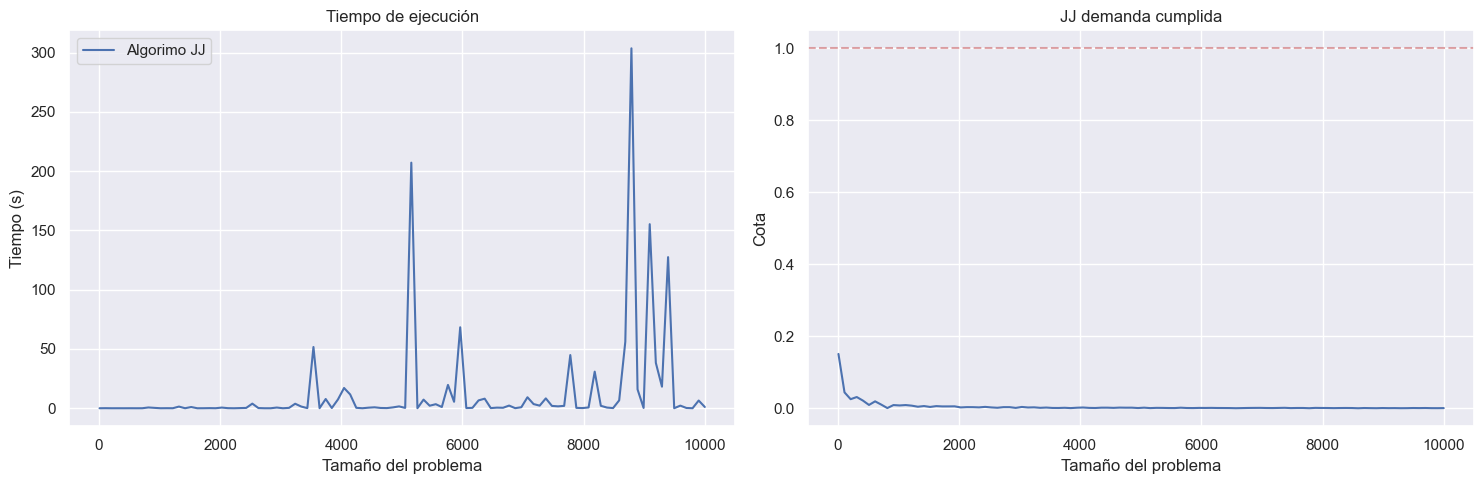

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(results['size'], results['jj_time'], label='Algorimo JJ')
ax1.set_title('Tiempo de ejecución')
ax1.set_xlabel('Tamaño del problema')
ax1.set_ylabel('Tiempo (s)')
ax1.legend()
# ax1.set_yscale('log')

# Plot optimality ratio
ax2.plot(results['size'], results['jj_demand_mean'])
ax2.set_title('JJ demanda cumplida')
ax2.set_xlabel('Tamaño del problema')
ax2.set_ylabel('Cota')
ax2.axhline(y=1.0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()